<a href="https://colab.research.google.com/github/AndrehAguiar/ALURA_imersao_dados/blob/main/ALURA_Imers%C3%A3oDados_3_dia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração e análise dos dados

## Importando as bibliotecas que serão utilizadas para a exploração.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando a base de dados.

In [2]:
url_data = 'https://github.com/alura-cursos/imersaodados3/blob/e36689c3d64c76ae8f16723ea0903bee10c89c3c/dados/dados_experimentos.zip?raw=true'
data = pd.read_csv(url_data, compression = 'zip')
data.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


<a name="desafio1"></a>

## Desafio 1: Investigar por que a classe tratamento é tão desbalanceada?

In [3]:
data[['tratamento', 'tempo', 'dose']].value_counts()

tratamento    tempo  dose
com_droga     48     D1      4011
              72     D1      3600
              48     D2      3591
              24     D1      3585
                     D2      3581
              72     D2      3580
com_controle  48     D1       343
              72     D1       307
                     D2       305
              48     D2       305
              24     D2       305
                     D1       301
dtype: int64

### Verificando as proporções de cada classe categórica

In [4]:
data[['tempo']].value_counts()

tempo
48       8250
72       7792
24       7772
dtype: int64

In [5]:
data[['tempo']].value_counts(normalize=True)

tempo
48       0.346435
72       0.327202
24       0.326363
dtype: float64

In [6]:
data[['tratamento']].value_counts()

tratamento  
com_droga       21948
com_controle     1866
dtype: int64

In [7]:
data[['tratamento']].value_counts(normalize=True)

tratamento  
com_droga       0.921643
com_controle    0.078357
dtype: float64

In [8]:
data[['dose']].value_counts()

dose
D1      12147
D2      11667
dtype: int64

In [9]:
data[['dose']].value_counts(normalize=True)

dose
D1      0.510078
D2      0.489922
dtype: float64

### Verificando se existem valores nulos da base de dados.

In [10]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

<a name="desafio2"></a>

## Desafio 2: Plotando as 5 últimas linhas da tabela

In [11]:
data.tail(5)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Explorando a base de dados.

### A base de dados está composta por 23814 linhas e 877 colunas.
Dentro desta estrutura se encontram 872 colunas do tipo "float"/Quantitativa contínua, 1 do tipo "int"/Quantitativa discreta e 4 do tipo "object"/Qualitativa nominal.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


### Analisando as informações estatísticas básicas dos dados numéricos.
Tendo em vista a descrição estatística, com exceção da classe "tempo", pode-se identificar que os dados estão normalizados entre -10 e 10, já o tempo varia entre 24 e 72.

In [13]:
data.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

### Analisando as informações estatísticas básicas dos dados categóricos.
Tendo em vista a descrição estatística, com exceção da classe "id", pode-se identificar que existem 2 classes de "tratamento" e 2 classes de "dose" e 3289 tipos de drogas experimentadas.

In [14]:
data.describe(include="O")

,id,tratamento,dose,droga
count,23814,23814,23814,23814
unique,23814,2,2,3289
top,id_40080ecfa,com_droga,D1,cacb2b860
freq,1,21948,12147,1866


<a name="desafio4"></a>

#### Solução desafio 4: Quantos tios de drogas foram experimentadas

In [15]:
data["droga"].describe(include="O")

count         23814
unique         3289
top       cacb2b860
freq           1866
Name: droga, dtype: object

<a name='desafio3'></a>

## Desafio 3: Proporção das classes tratamento.

In [16]:
tratamentos = data[['tratamento']].value_counts()
proporcao = tratamentos[0] / tratamentos[1]
print(f'A proporção da classe tratamento é de:\n{proporcao} experimentos "{tratamentos.index[0][0]}" para cada experimento "{tratamentos.index[1][0]}"')

A proporção da classe tratamento é de:
11.762057877813504 experimentos "com_droga" para cada experimento "com_controle"


<a name="desafio6"></a>

## Desafio 6: Renomear as colunas tirando o hífen

In [17]:
columns_list = list(data.columns.values) # Converte as colunas numa lista de strings
string_columns_list = str(columns_list) # Converte a lista em um string/texto
string_columns_list = string_columns_list.replace("'","").replace("-","")[1:-1] # Remove os hífens e aspas simples ignorando os colchetes do início e final.
columns_list = string_columns_list.split(", ") # Separa cada valor separado por ", "
data.columns = columns_list
data.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2', 'g3',
       'g4',
       ...
       'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99'],
      dtype='object', length=877)

<a name = "desafio5"></a>

## Desafio 05: Procurar na documentação o método query(pandas).

In [26]:
data.query("tratamento == 'com_droga' & g0 > 0").describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,...,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.00000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000,10967.000000
mean,48.089724,1.106427,0.005426,0.262884,0.065943,0.262076,-0.253207,0.151431,-0.285703,-0.557159,-0.102669,-0.401402,0.327178,0.081709,0.457193,-0.287907,-0.162528,-0.199081,-0.293496,0.085079,-0.074315,-0.390710,0.030445,0.119658,-0.095280,-0.245524,-0.107641,-0.331106,0.129905,-0.231758,-0.227533,-0.481117,0.659740,-0.196971,-0.113023,-0.139386,0.336460,-0.258476,-1.241280,1.006189,...,-1.086528,-0.772780,-0.933337,-1.167508,-0.839596,-1.241360,-0.942636,-0.999948,-0.888920,-0.633914,-1.158932,-0.779394,-0.952611,-1.044833,-0.213332,-0.989288,-0.56549,-0.930943,-0.913211,-0.907031,-0.986987,-0.953801,-1.002470,-0.980029,-0.919458,-0.902012,-0.743287,-0.663038,-0.729038,-0.869266,-0.990370,-0.977951,-1.020938,-1.076369,-1.091738,-0.736856,-0.984457,-0.774567,-0.995623,-0.649928
std,19.472469,1.581798,0.854982,1.063411,1.110449,1.139969,1.267964,0.977211,1.405632,2.319903,1.260061,1.632653,1.455728,1.383615,1.609411,1.531422,0.721586,1.728561,1.484640,0.839801,0.942648,1.453536,0.862312,1.092494,0.869899,1.467910,1.010603,1.266513,1.111493,1.302718,1.601882,1.668083,2.039834,1.057509,1.381402,1.363083,1.239959,1.771363,2.842744,2.572385,...,2.839954,2.306074,2.522554,2.962451,2.344401,2.907896,2.611269,2.700472,2.517579,1.911062,2.908983,2.308416,2.577949,2.663100,1.281859,2.683157,1.81676,2.554208,2.549253,2.331290,2.663100,2.701785,2.666649,2.686341,2.604288,2.523714,2.166989,2.191032,2.227989,2.494244,2.661032,2.684715,2.601499,2.841195,2.855264,2.126328,2.737038,2.246324,2.375102,1.819994
min,24.000000,0.000100,-5.737000,-5.975000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.387000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.607000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.835000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.93800,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,0.237250,-0.455550,-0.351600,-0.511750,-0.341850,-0.759750,-0.435450,-0.560650,-0.722450,-0.547750,-0.736450,-0.473400,-0.524700,-0.439000,-0.738700,-0.555500,-0.623950,-0.618150,-0.319200,-0.502700,-0.788300,-0.434950,-0.434700,-0.49520

In [27]:
data.query("tratamento == 'com_droga' & g0 > 0").describe(include="O")

,id,tratamento,dose,droga
count,10967,10967,10967,10967
unique,10967,1,2,3077
top,id_40080ecfa,com_droga,D1,87d714366
freq,1,10967,5717,718


In [28]:
data.query("tratamento == 'com_droga' & g0 < 0").describe(include="O")

,id,tratamento,dose,droga
count,10960,10960,10960,10960
unique,10960,1,2,3043
top,id_a8459661e,com_droga,D2,d08af5d4b
freq,1,10960,5490,117


In [29]:
data.query("g0 > 0")["tratamento"].value_counts()

com_droga       10967
com_controle      802
Name: tratamento, dtype: int64

In [30]:
data.query("g0 < 0")["tratamento"].value_counts()

com_droga       10960
com_controle     1063
Name: tratamento, dtype: int64

## Visualizando os dados

<a name="desafio7"></a>
## Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot)

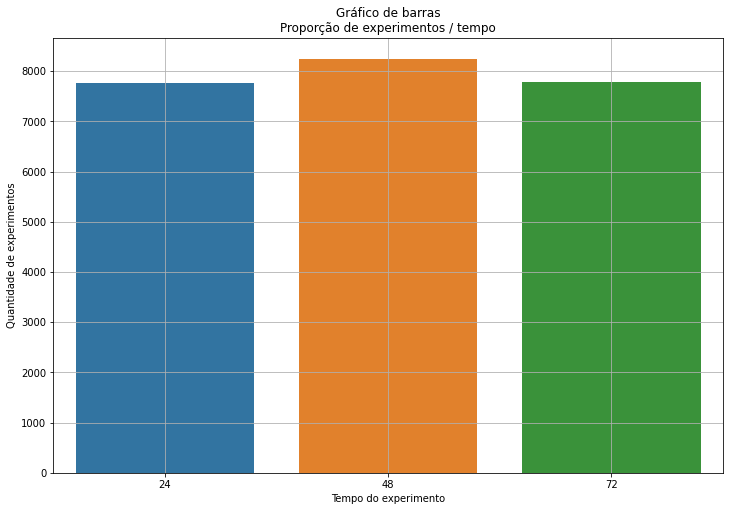

In [23]:
data_to_plot = data["tempo"].value_counts()
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
ax.set(title="Gráfico de barras\nProporção de experimentos / tempo",
       ylabel="Quantidade de experimentos",
       xlabel="Tempo do experimento")
plt.grid();

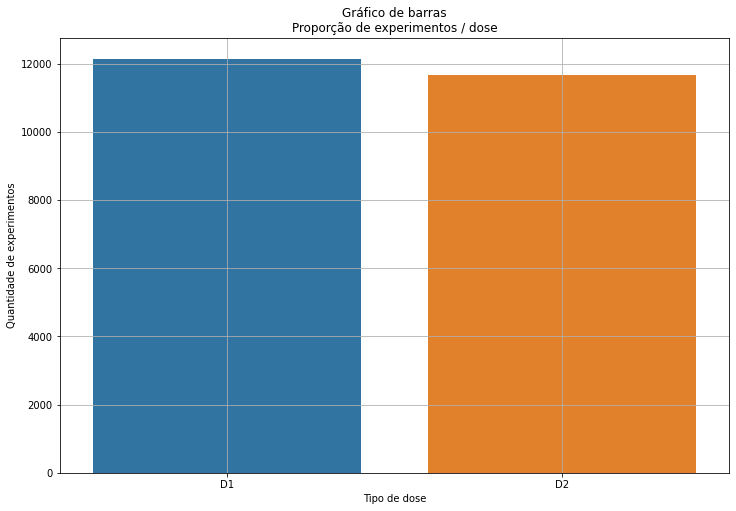

In [24]:
data_to_plot = data["dose"].value_counts()
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
ax.set(title="Gráfico de barras\nProporção de experimentos / dose",
       ylabel="Quantidade de experimentos",
       xlabel="Tipo de dose")
plt.grid();

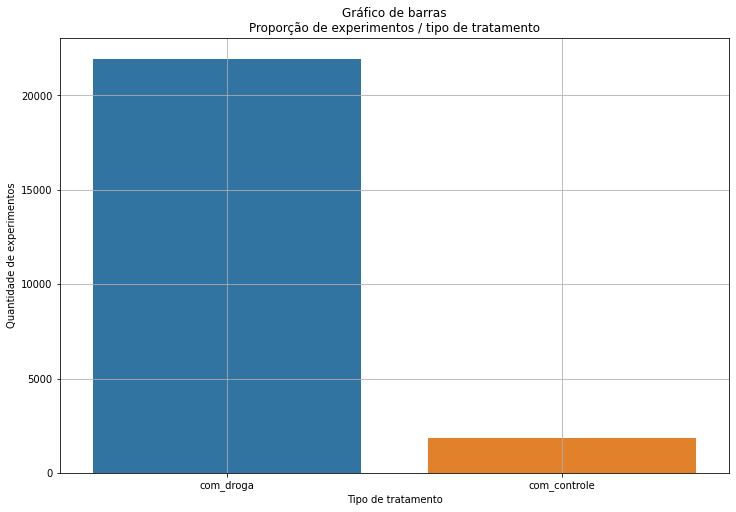

In [25]:
data_to_plot = data["tratamento"].value_counts()
plt.figure(figsize=(12,8))
ax = sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
ax.set(title="Gráfico de barras\nProporção de experimentos / tipo de tratamento",
       ylabel="Quantidade de experimentos",
       xlabel="Tipo de tratamento")
plt.grid();

#### Resumo
Os dados apresentam um pré-processamento prévio, como citado durante a análise as variáveis quantitativas contínuas estão entre -10 e 10, e não possuem dados faltantes ou nulos. Aparentemente, estas variáveis não têm relação direta com as variáveis categóricas ou entre si.

As variáveis qualitativas, exceto o tipo de tratamento, estão balanceadas contendo uma diferença irrelevante de ocorrências entre seus valores. A classe tratamento pode estar com a proporção relevante pelo fato dos experimentos com drogas serem mais comuns, principalmente pela quantidade de drogas que são submetidas a teste.

## Desafios aula 1

### Desafio 01: Investigar por que a classe tratamento é tão desbalanceada? <a href='#desafio1'>Ver solução</a>

### Desafio 02: Plotar as 5 últimas linhas da tabela <a href='#desafio2'>Ver solução</a>

### Desafio 03: Proporção das classes tratamento. <a href='#desafio3'>Ver solução</a>

### Desafio 04: Quantos tipos de drogas foram investigados. <a href="#desafio4">Ver solução</a>

### Desafio 05: Procurar na documentação o método query(pandas). <a href="#desafio5">Ver solução</a>

### Desafio 06: Renomear as colunas tirando o hífen. <a href="#desafio6">Ver solução</a>

### Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot) <a href="#desafio7">Ver solução</a>

### Desafio 08: Resumo do que você aprendeu com os dados  <a href="#desafio8">Ver solução</a>